# Part 2: Data analysis in Python

In this exercise, a dataset about real estate `real_estate.csv` is given. Class `DataPreprocessing` preprocess data for further analysis. Two classes `LinearRegression` and `PolynomialRegression` will be used for analysis of this dataset.

First, we import all the necessary libraries for data processing, visualization and analysis:

* `pandas` is used for reading data from `.csv` file into a dataframe
* `numpy` is used for getting information from dataframe and further processing
* `matplotlib` is used for data visualization
* `sklearn` is a library with multiple tools for data preprocessing and analysis. For your information (you do not need to use this library in your work), in this exercise we use:
* `PolynomialFeatures` to add additional attributes to the data
* `LinearRegression` to learn the best fit line/curve for our predictive model
* `train_test_split` to split the data you have preprocessed into data for training model and for testing model

## 2.1 Data preprocessing
In the first part of this exercise, you are given a prewritten class `DataPreprocessing`. The job is to fulfilled all the necessary methods for the class

### Exercise 6
Write method `set_attributes_and_output` to take data from the dataframe, put the attributes into `self.X` and the output into `self.y`. Note: `self.X` and `self.y` should be 2D and 1D numpy array

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html

### Exercise 7
Create a new `DataPreprocessing` object called `dp`. Call all the necessary methods to get the result below

### Exercise 8
(For your reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Use the method `train_test_split` from sklearn.model_selection, write method `final_train_test_data` to split the X and y data into training and testing data. Parameters of `final_train_test_data`:

* `attributes_list`: the attributes that you want to take (0 -> 5, correspond to X1 -> X6). Default to all attributes: [0,1,2,3,4,5]
* `test_size`: the size/percentage of the testing data in X and y data. Default to 0.2

### Exercise 9
Create training and testing dataset using implementation of `final_train_test_data` from the exercise above. Your input should consist of only 3 attributes from the original dataframe: *X3 distance to the nearest MRT station, X5 latitude, X6 longitude*. Split the training and testing dataset with the size of testing data being 20%

The output should be a tuple (`X_train`, `X_test`, `y_train`, `y_test`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


class DataPreprocessing():

    def __init__(self):
        # Auto initialize necessary attributes of the object
        self.dataframe = None
        self.X = None
        self.y = None

    def read_from_csv(self):
        # Read data from .csv file into the dataframe and display the first 5 rows
        df = pd.read_csv('real_estate.csv', index_col='No')
        self.dataframe = df
        display(self.dataframe.head())

    def set_attributes_and_output(self):
            # Set X and y to data attributes and output from the dataframe

        self.X=self.dataframe.iloc[:,:-1].values
        self.y=self.dataframe.iloc[:,-1].values
        
        

    def visualize_data(self):
 
        # Visualize relation between each attribute and output
        columns_plot = np.array(self.dataframe.columns)[:-1].reshape(3, -1)
        fig, ax = plt.subplots(3, 2, figsize=(10, 8), sharey=True)
        fig.suptitle('Correlation between each attribute and the house price of unit area')

        for i in range(3):
            for j in range(2):
                ax[i, j].scatter(self.X[:, i * 2 + j], self.y, s=10, color="bgrcmy"[i * 2 + j])
                ax[i, j].set_xlabel(columns_plot[i, j].split(' ', 1)[1].title())

        fig.tight_layout()
        fig.add_subplot(111, frameon=False)
        plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
        plt.ylabel(self.dataframe.columns[-1].split(' ', 1)[1].title())
        plt.show()

    def final_train_test_data(self, attributes_list=[0, 1, 2, 3, 4, 5], test_size=0.2):
        # Split the data X and output y into training data and testing data
        # Output: a tuple (X_train, X_test, y_train, y_test), using train_test_split with random_state=42
        return train_test_split(np.hstack([self.X[:, col:col+1] for col in attributes_list]),self.y,test_size=test_size,random_state=42)




In [3]:
dp = DataPreprocessing()
dp.read_from_csv()
dp.set_attributes_and_output()
print('First house\'s age:', dp.X[0][1])
print('House price/unit are:', dp.y[0])

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


First house's age: 32.0
House price/unit are: 37.9


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


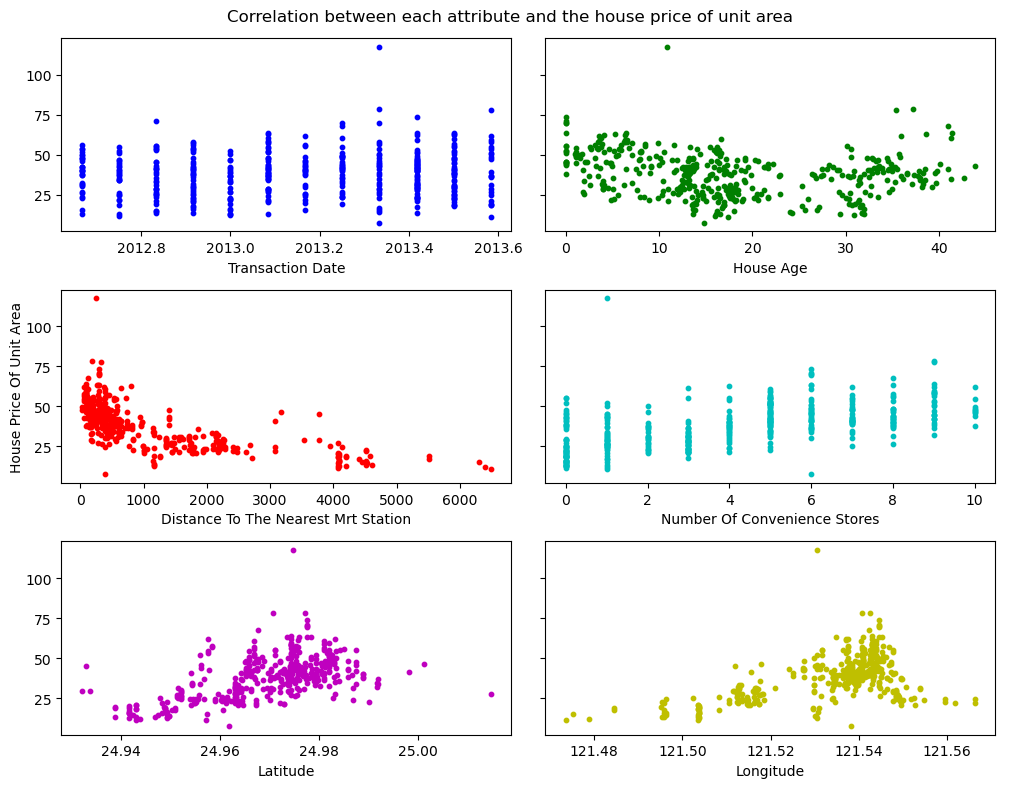

In [2]:
temp=DataPreprocessing()
temp.read_from_csv()
temp.set_attributes_and_output()
temp.visualize_data()
X_train,X_test,y_train,y_test=temp.final_train_test_data([2,4,5])

## 2.2 Data analysis
In the second part of this exercise, we are about to use 2 machine learning models: `Linear Regression` and `Polynomial Regression` to learn about the features of the training dataset, so that if we are given new data about a house, we can use the model to predict it.

You do not need to know the implementation inside `sklearn.linear_model.LinearRegression` to do this exercise; just see it as a black box for data analysis. The image below is an easy explaination of what `Linear Regression` and `Polynomial Regression` are (but you also don't need to know in detail)

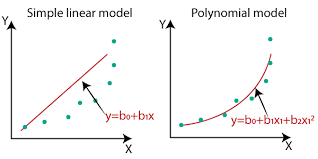


Three prewritten classes for the models are given in this exercise's second part:

In [52]:
class BaseClassRegressionAnalysis():
    def __init__(self):
        # Initialize a regressor, which will handle the LinearRegression model 
        self.regressor = LinearRegression()
    
    def fit(self, X, y):
        # The regressor learn from the training data with input X and output y
        self.regressor.fit(X, y)
        
    def predict(self, X):
        # The regressor predict the result with input X (after being trained)
        # The output has the same size as output y
        return self.regressor.predict(X)
    
    def mean_square_error(self, y_real, y_predict):
        # Compare the 2 output vectors: real output and prediction, using mean square error
        return np.mean((y_predict-y_real)**2)
        
    def visualize_prediction(self, y_real, y_predict):
        # Visualize the 2 output vectors: real output and prediction with each instances 
        x = np.arange(y_real.shape[0]) # Numbering the instances from 0 for x-axis of the plot
        fig,ax=plt.subplots()
        ax.plot(x,y_real,color='blue',label='Real')
        ax.plot(x,y_predict,color='orange',label='Predict')
        ax.set(title='Visualize output and prediction',xlabel='Instance',ylabel='Prediction')
        fig.legend()

In [53]:
class LinearRegressionAnalysis(BaseClassRegressionAnalysis):
    def __init__(self):
        super().__init__()
    def fit(self, X, y):
        return super().fit(X, y)
    def predict(self, X):
        return super().predict(X)
    def mean_square_error(self, y_real, y_predict):
        return super().mean_square_error(y_real, y_predict)
    def visualize_prediction(self, y_real, y_predict):
        return super().visualize_prediction(y_real, y_predict)

In [54]:
class PolynomialRegressionAnalysis(BaseClassRegressionAnalysis):
    def __init__(self, degree):
        super().__init__()
        self.degree = degree
    
    def __poly_transform(self, X):
        poly = PolynomialFeatures(degree=self.degree)
        Xt = poly.fit_transform(X)
        return Xt
    
    def fit(self, X, y, degree=2):
        Xt = self.__poly_transform(X)
        super().fit(Xt, y)
        
    def predict(self, X):
        Xt = self.__poly_transform(X)
        return super().predict(Xt)

### Exercise 10
Complete the `mean_square_error` method in `BaseClassRegressionAnalysis` to compare the prediction to the real output.

For example, if the real output is [1, 0, 1, 0, 1] and your prediction is [2, -1, 0, 1, 2], then the mean square error is 1

### Exercise 11
Complete the `visualize_prediction` method in `BaseClassRegressionAnalysis` to visualize the difference between the prediction and the real output. Your visualization should look like the image below

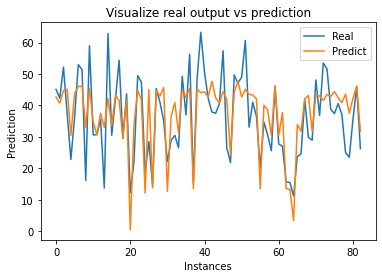

### Exercise 12
This is the steps for analysis of preprocessed real_estate.csv data (from exercise 9) using LinearRegressionAnalysis class above:

First 10 instances prediction (rounded to 1 decimal place):      [42.7 40.8 44.7 45.1 30.5 43.8 46.1 46.1 32.9 45.4]
Real output of first 10 instances (rounded to 1 decimal place):  [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]
Mean square error:  73.24424038929511


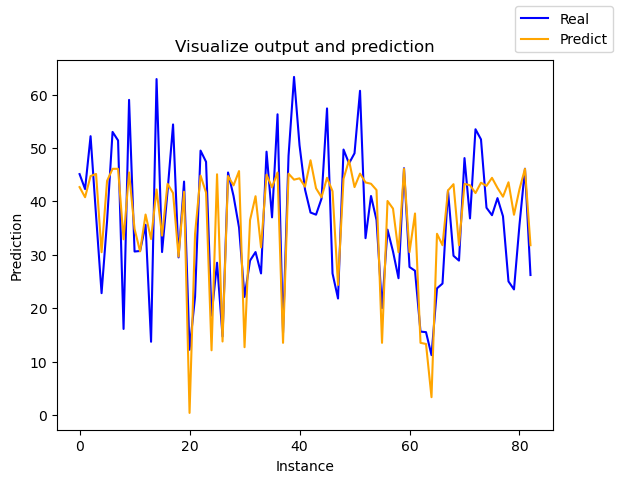

In [55]:


# Step 1: Initialize a regressor (a model) to learn from data
lr = LinearRegressionAnalysis()

# Step 2: The regressor will learn from the input and output of training data
lr.fit(X_train, y_train)

# Step 3: After learning from training data, the model will make a prediction based on input testing data
y_pred = lr.predict(X_test)

# Step 4: Comparision and visualization
print('First 10 instances prediction (rounded to 1 decimal place):     ', np.array([round(i, 1) for i in y_pred[:10]]))
print('Real output of first 10 instances (rounded to 1 decimal place): ', y_test[:10])
print('Mean square error: ', lr.mean_square_error(y_test, y_pred))
lr.visualize_prediction(y_test, y_pred)

First 10 instances prediction (rounded to 1 decimal place):      [42.7 40.8 44.7 45.1 30.5 43.8 46.1 46.1 32.9 45.4]

Real output of first 10 instances (rounded to 1 decimal place):  [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]

Mean square error:  73.24424038929318

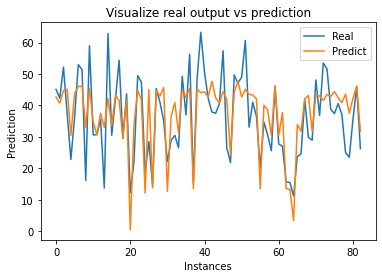

Create a polynomial regressor with the degree of 2 for analysis of the data and output with the same format above

First 10 instances prediction (rounded to 1 decimal place): [44.5 40.5 47.2 48.6 22.8 44.8 48.9 48.9 29.7 48.8]
Real output of first 10 instances (rounded to 1 decimal place): [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]
Mean square error (rounded to 1 decimal place): 63.8


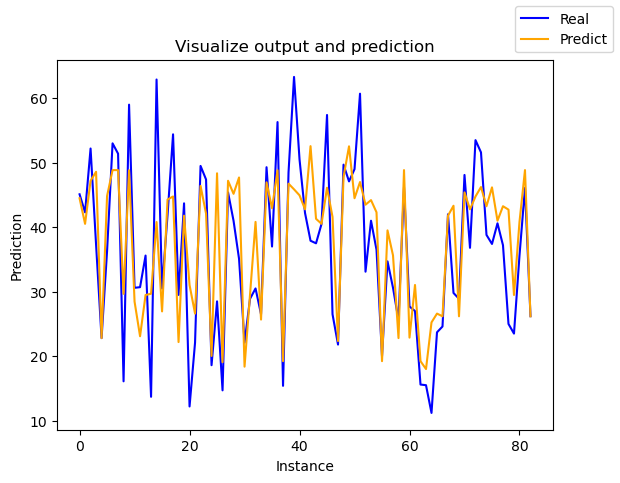

In [59]:
# Step 1: Initialize a regressor (a model) to learn from data
pr=PolynomialRegressionAnalysis(degree=2)
##################
# YOUR CODE HERE #
##################

# Step 2: The regressor will learn from the input and output of training data
pr.fit(X_train, y_train)

# Step 3: After learning from training data, the model will make a prediction based on input testing data
y_pred = pr.predict(X_test)

# Step 4: Comparision and visualization
print('First 10 instances prediction (rounded to 1 decimal place):', np.array([round(i, 1) for i in y_pred[:10]]))
print('Real output of first 10 instances (rounded to 1 decimal place):', y_test[:10])
print('Mean square error (rounded to 1 decimal place):', round(pr.mean_square_error(y_test, y_pred),1))
pr.visualize_prediction(y_test, y_pred)

First 10 instances prediction (rounded to 1 decimal place):      [44.5 40.5 47.2 48.6 22.8 44.8 48.9 48.9 29.7 48.8]

Real output of first 10 instances (rounded to 1 decimal place):  [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]

Mean square error (rounded to 1 decimal place): 63.8

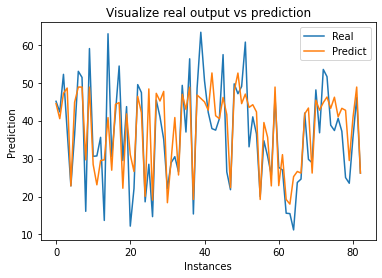